In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cars-dataset.csv')

In [3]:
df.shape

(398, 8)

In [4]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
df.info()

# hp is of the type 'object'. This looks suspicious as hp is expected to be of 'int' datatype. We can explore this further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
df['hp'].unique()

# It's observed that there's a '?' in the hp column

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
df[df['hp']=='?']

# There are 6 rows which have '?' in 'hp'

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [8]:
# Replacing '?' with NaN in the 6 observations
df2=df.replace('?',np.nan)

In [9]:
# Changing the data type of 'hp' to float
df2['hp']=df2['hp'].astype('float')

In [10]:
# Replacing '?' with the median
df2[['hp']] = df2[['hp']].apply(lambda x: x.fillna(x.median()))

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
df2.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


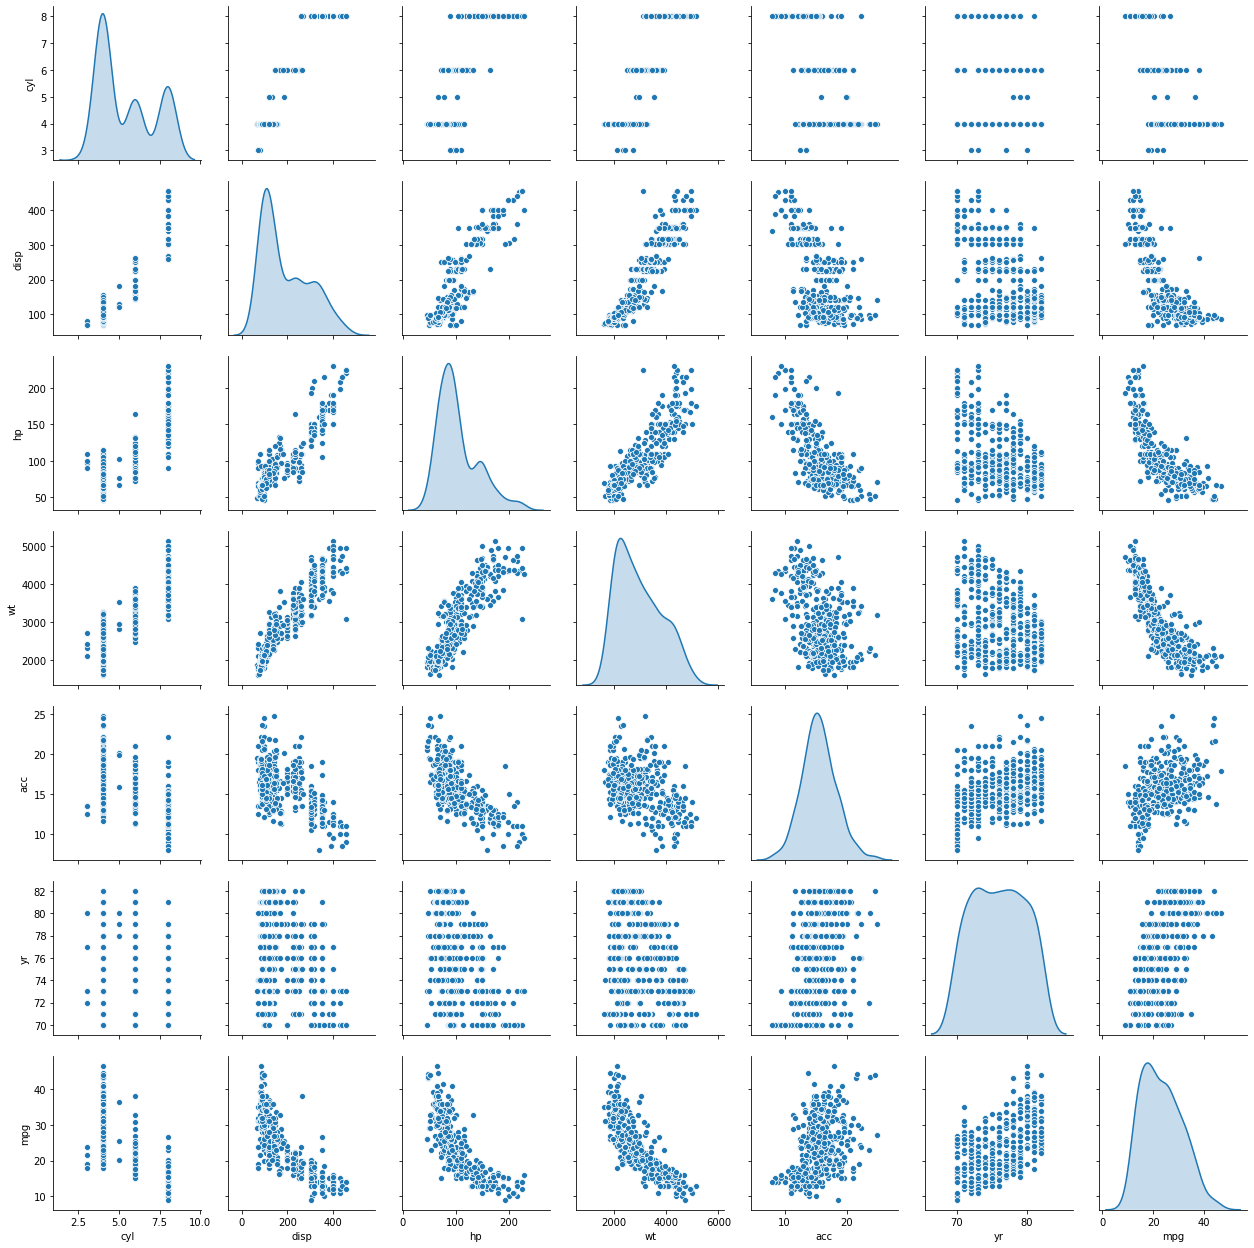

In [13]:
sns.pairplot(df2,diag_kind='kde')

# The pairplot diagonal distributions show that there are likely to be two or three Gaussians

# Acc seems to be a poor predictor of mpg. However, for the purpose of identifying clusters, Acc is not dropped

In [14]:
# Dropping 'car name' as it is not required for clustering
df2.drop(['car name'],axis=1,inplace=True)

In [15]:
# Using Z - score to standardize the features
from scipy.stats import zscore 
df2_z = df2.apply(zscore)

In [16]:
# Running the k-means clustering algorithm for k=2 to k=5. We could expect 2 or 3 to be the optimal number of clusters

cluster_range = range(2, 6)   
cluster_errors=[]
for k in cluster_range:
  clusters = KMeans(k, n_init = 5)
  clusters.fit(df2_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1295.122935
1,3,946.019791
2,4,738.392328
3,5,667.584753


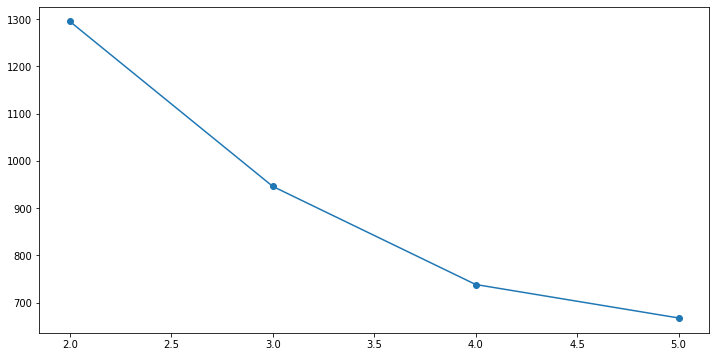

In [17]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot shows that 3 or 4 could be the optimal number of cluster. After trial and error, 
# it's observed that there could be three meaningful clusters (Explained in later cells)

In [18]:
# Running the k-means algorithm for k=3
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(df2_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [19]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 0.35772459,  0.24687769, -0.04275477,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415],
       [ 1.49819126,  1.50068407,  1.51412926,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315]])

In [20]:
prediction=cluster.predict(df2_z)

In [21]:
# Adding the predicted classes to the dataframe
df2_z['Group']=prediction

In [22]:
df2_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,Group
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002120D3A2748>,
      dtype=object)

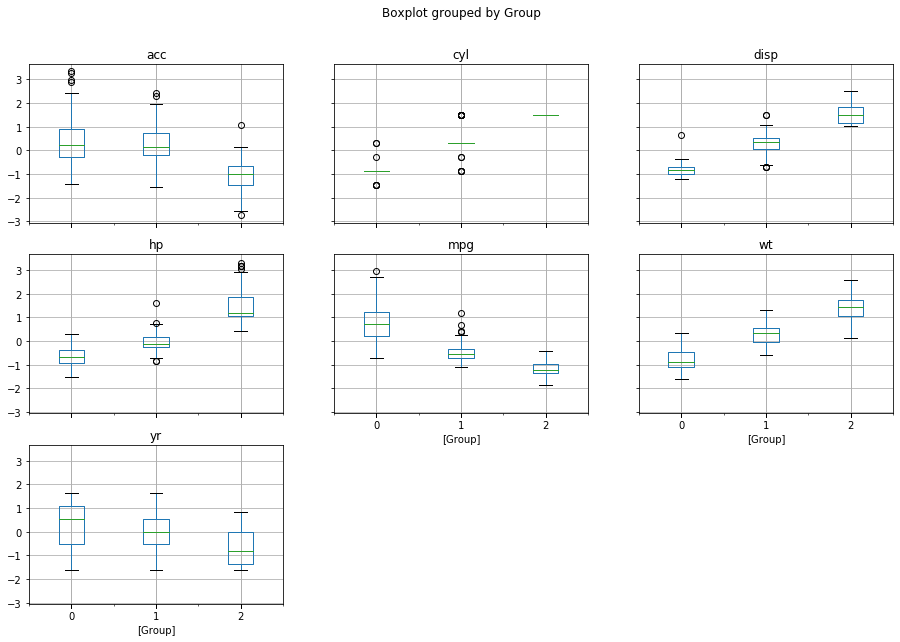

In [23]:
# Using boxplots to identify the differences in groups
df2_z.boxplot(by = 'Group', figsize=(15, 10))

### Group 0 cars are low weight cars with low displacement, low hp, fewer cylinders compared to the other groups, and high mileage - this group could be hatchbacks and small sedans

### Group 1 cars are mid weight cars with mid range displacement, mid range hp, more cylinders than in group 0, and mid range mileage - this group could be larger sedans and powerful hatchbacks

### Group 2 cars are the heaviest with high displacement, high hp, highest number of cylinders and lowest mileage - this group could be SUVs

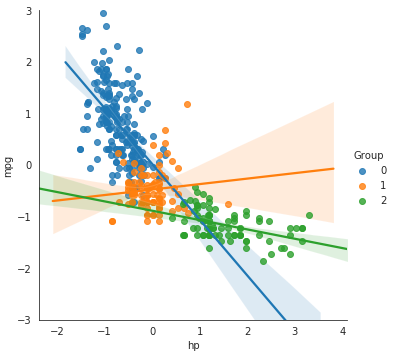

In [24]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=df2_z,hue='Group')
plot.set(ylim = (-3,3))

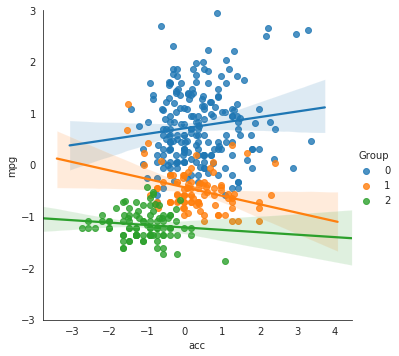

In [25]:
# mpg Vs acc

var = 'acc'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=df2_z,hue='Group')
plot.set(ylim = (-3,3))

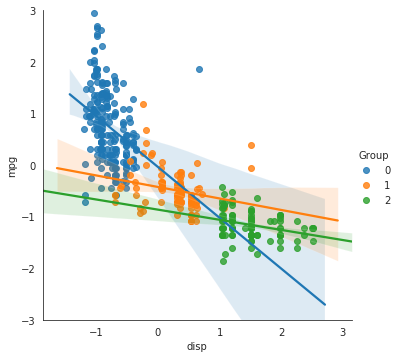

In [26]:
# mpg Vs disp

var = 'disp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=df2_z,hue='Group')
plot.set(ylim = (-3,3))

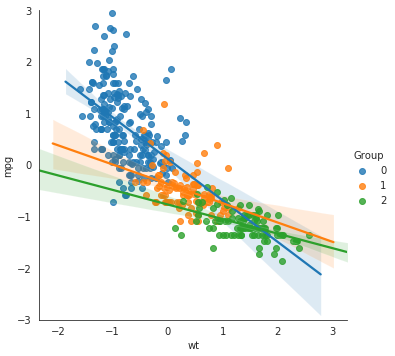

In [27]:
# mpg Vs wt

var = 'wt'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=df2_z,hue='Group')
plot.set(ylim = (-3,3))

### Linear regression modelling

In [28]:
# df_lr=df2_z.drop(['disp','wt'],axis=1)
df_lr=df2_z.copy()


In [29]:
# Creating separate dataframes for each of the 3 groups
df_g0=df_lr[df_lr['Group']==0]
df_g1=df_lr[df_lr['Group']==1]
df_g2=df_lr[df_lr['Group']==2]

In [30]:
df_g0.head()

,cyl,disp,hp,wt,acc,yr,mpg,Group
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497,0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.190289,0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.062185,0


### Linear regression model for group 0

In [31]:
# Running the linear regression model for group 0

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_g0.drop(['mpg','Group'],axis=1)
y=df_g0[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [32]:
regression_model_g0 = LinearRegression()
regression_model_g0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
regression_model_g0.score(X_test,y_test)

0.6540551268764747

In [34]:
# Printing the coefficients for the group 0 linear regression model

coeff_df_g0 = pd.DataFrame(regression_model_g0.coef_.transpose(),index=X.columns,columns=['Coefficients'])
coeff_df_g0

,Coefficients
cyl,1.100180
disp,-0.411839
hp,-0.436773
wt,-0.617729
acc,0.011036
yr,0.416969


### Linear regression model for group 1

In [35]:
# Running the linear regression model for group 1

X=df_g1.drop(['mpg','Group'],axis=1)
y=df_g1[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [36]:
regression_model_g1 = LinearRegression()
regression_model_g1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
regression_model_g1.score(X_test,y_test)

0.5383567298303309

In [38]:
# Printing the coefficients for the group 1 linear regression model

coeff_df_g1 = pd.DataFrame(regression_model_g1.coef_.transpose(),index=X.columns,columns=['Coefficients'])
coeff_df_g1

,Coefficients
cyl,0.181776
disp,-0.113290
hp,-0.098098
wt,-0.377908
acc,-0.041114
yr,0.218764


### Linear regression model for group 2

In [39]:
# Running the linear regression model for group 2

X=df_g2.drop(['mpg','Group'],axis=1)
y=df_g2[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [40]:
regression_model_g2 = LinearRegression()
regression_model_g2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
regression_model_g2.score(X_test,y_test)

0.2955727613958675

In [42]:
# Printing the coefficients for the group 2 linear regression model

coeff_df_g2 = pd.DataFrame(regression_model_g2.coef_.transpose(),index=X.columns,columns=['Coefficients'])
coeff_df_g2

,Coefficients
cyl,0.063859
disp,-0.056477
hp,-0.080410
wt,-0.218085
acc,-0.158190
yr,0.176463


## We see that the linear regression models on individual groups do not predict mpg with high accuracy.